In [8]:
#Step 1:-Import the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [9]:
# Load The Dataset
df=pd.read_csv('Bank Marketing.csv')

In [10]:
# Find top 5 rows
df.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


### BASIC EDA

In [11]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [12]:
df.isna().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

In [13]:
# Get statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
Balance (euros),45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
Last Contact Day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
Last Contact Duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
Campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
Pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
Previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Subscription,45211.0,1.116985,0.321406,1.0,1.0,1.0,1.0,2.0


###  Plot distributions of selected numerical features

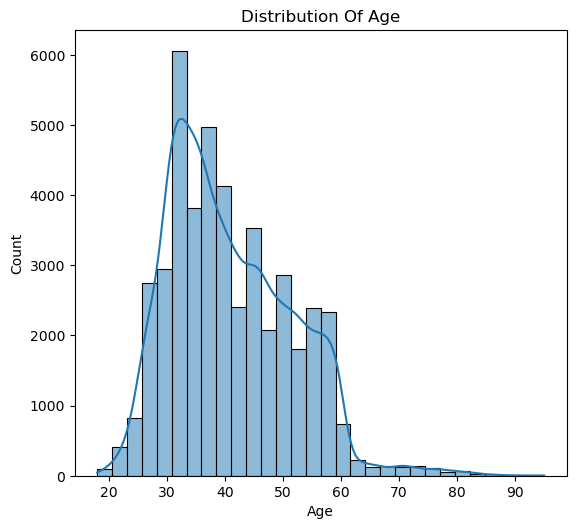

In [14]:

plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.histplot(df['Age'], bins=30, kde=True).set(title='Distribution Of Age')
plt.tight_layout()
plt.show()

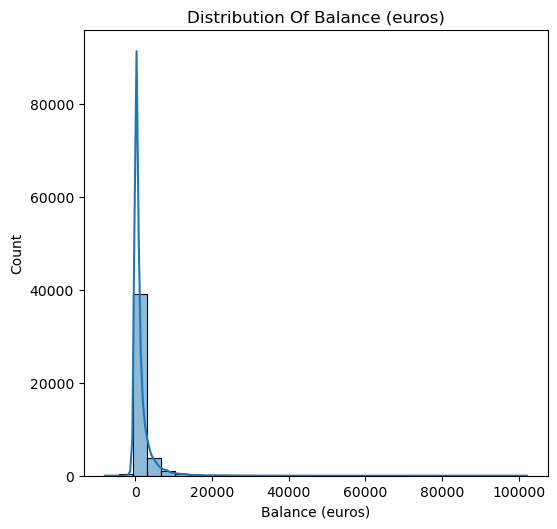

In [15]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,2)
sns.histplot(df['Balance (euros)'],bins=30, kde=True).set(title='Distribution Of Balance (euros)')
plt.tight_layout()
plt.show()

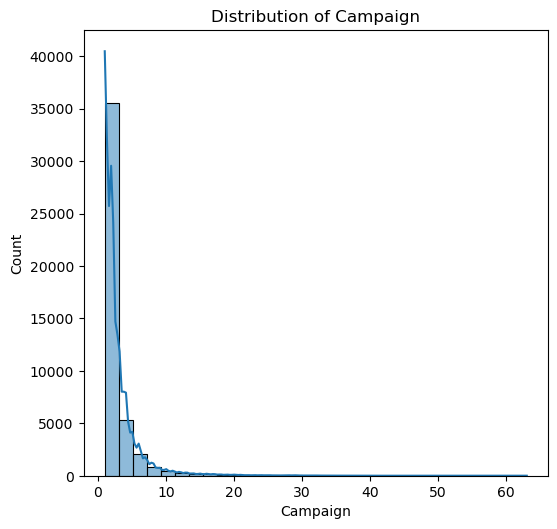

In [16]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,3)
sns.histplot(df['Campaign'], bins=30, kde=True).set(title='Distribution of Campaign')
plt.tight_layout()
plt.show()


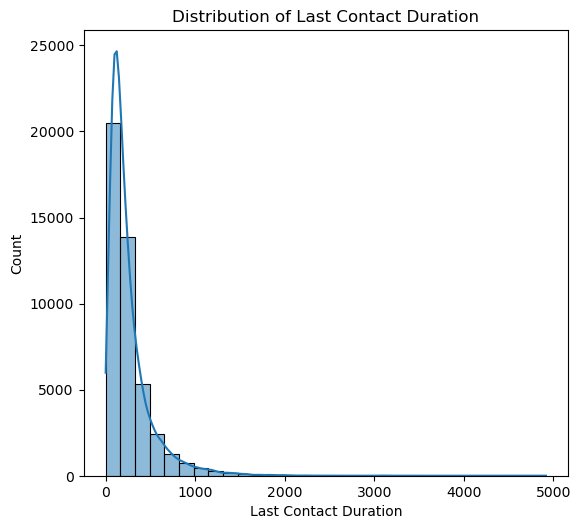

In [17]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,4)
sns.histplot(df['Last Contact Duration'],bins=30, kde=True).set(title='Distribution of Last Contact Duration')
plt.tight_layout()
plt.show()


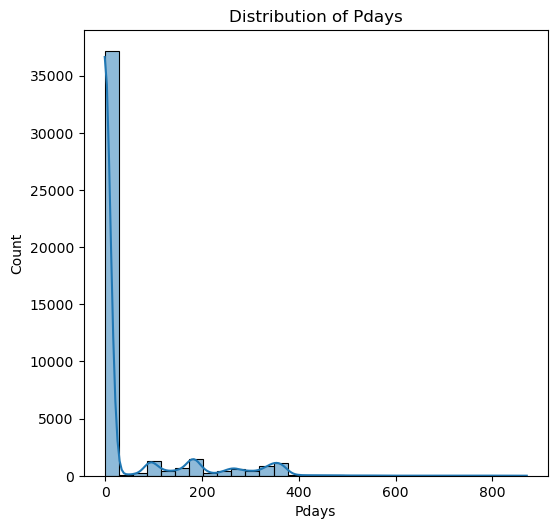

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,5)
sns.histplot(df['Pdays'],bins=30, kde=True).set(title='Distribution of Pdays')
plt.tight_layout()
plt.show()


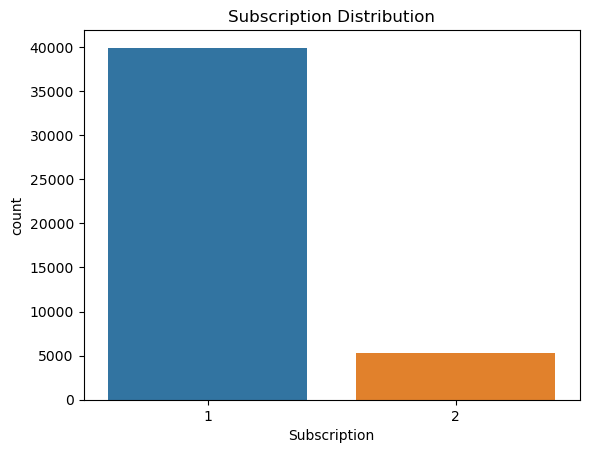

In [19]:
# Visualizing the target variable distribution
sns.countplot(x="Subscription",data=df)
plt.title('Subscription Distribution')
plt.show()

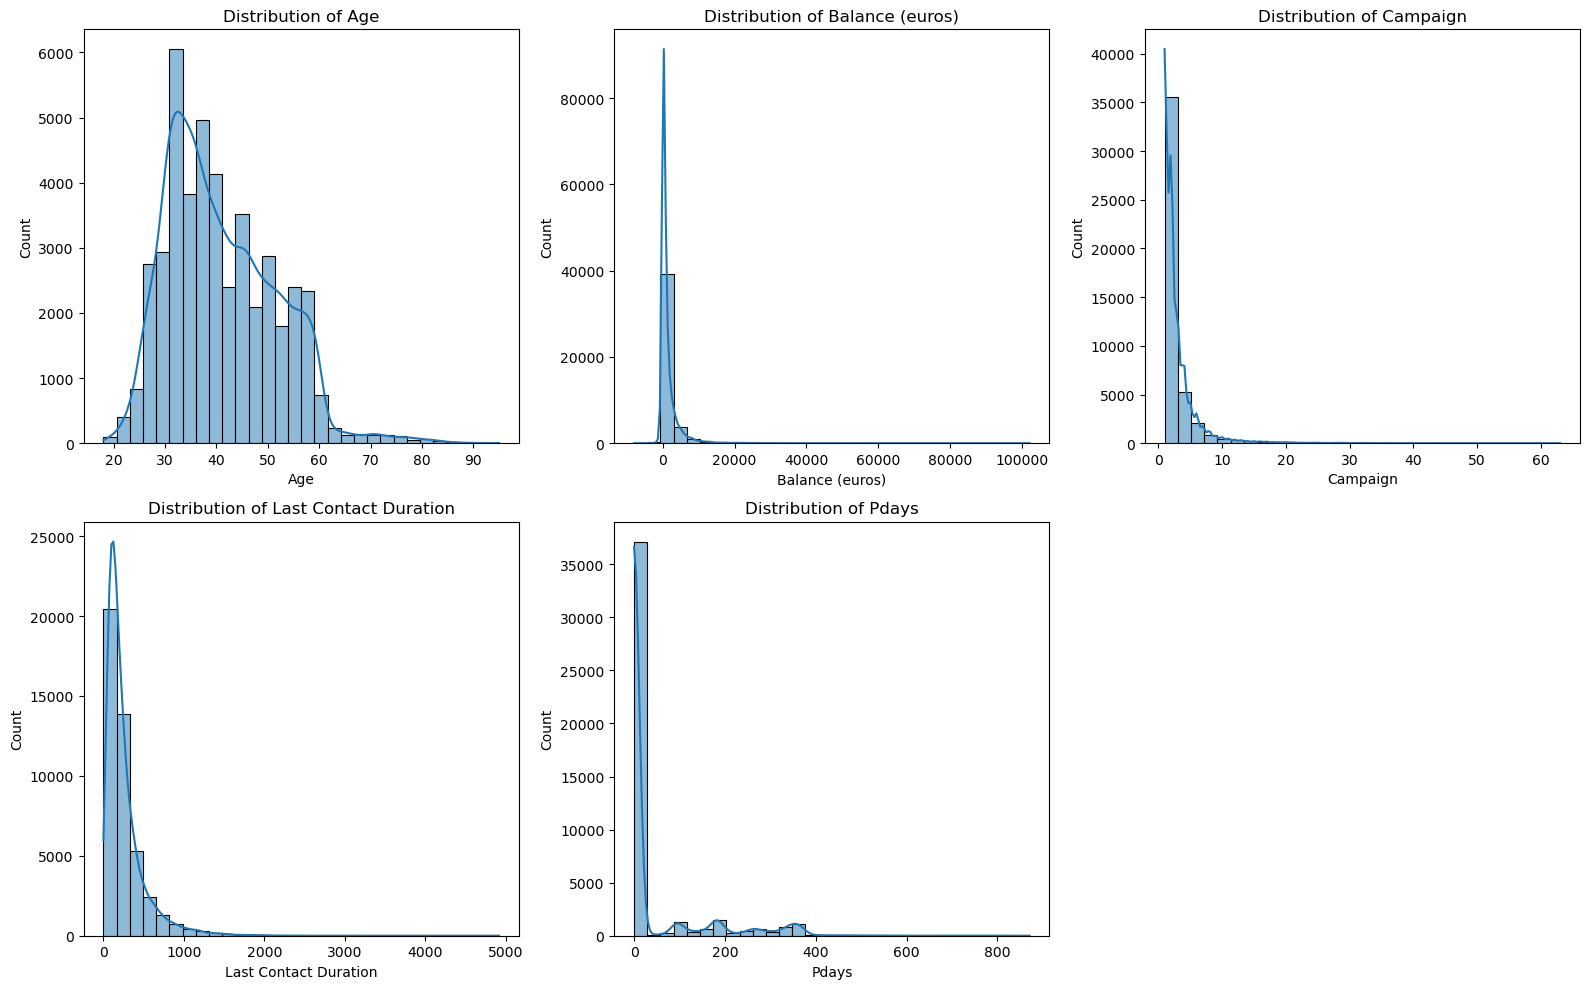

In [20]:

# Plot distributions of selected numerical features
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True).set(title='Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(df['Balance (euros)'], bins=30, kde=True).set(title='Distribution of Balance (euros)')

plt.subplot(2, 3, 3)
sns.histplot(df['Campaign'], bins=30, kde=True).set(title='Distribution of Campaign')

plt.subplot(2, 3, 4)
sns.histplot(df['Last Contact Duration'], bins=30, kde=True).set(title='Distribution of Last Contact Duration')

plt.subplot(2, 3, 5)
sns.histplot(df['Pdays'], bins=30, kde=True).set(title='Distribution of Pdays')

plt.tight_layout()
plt.show()




In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

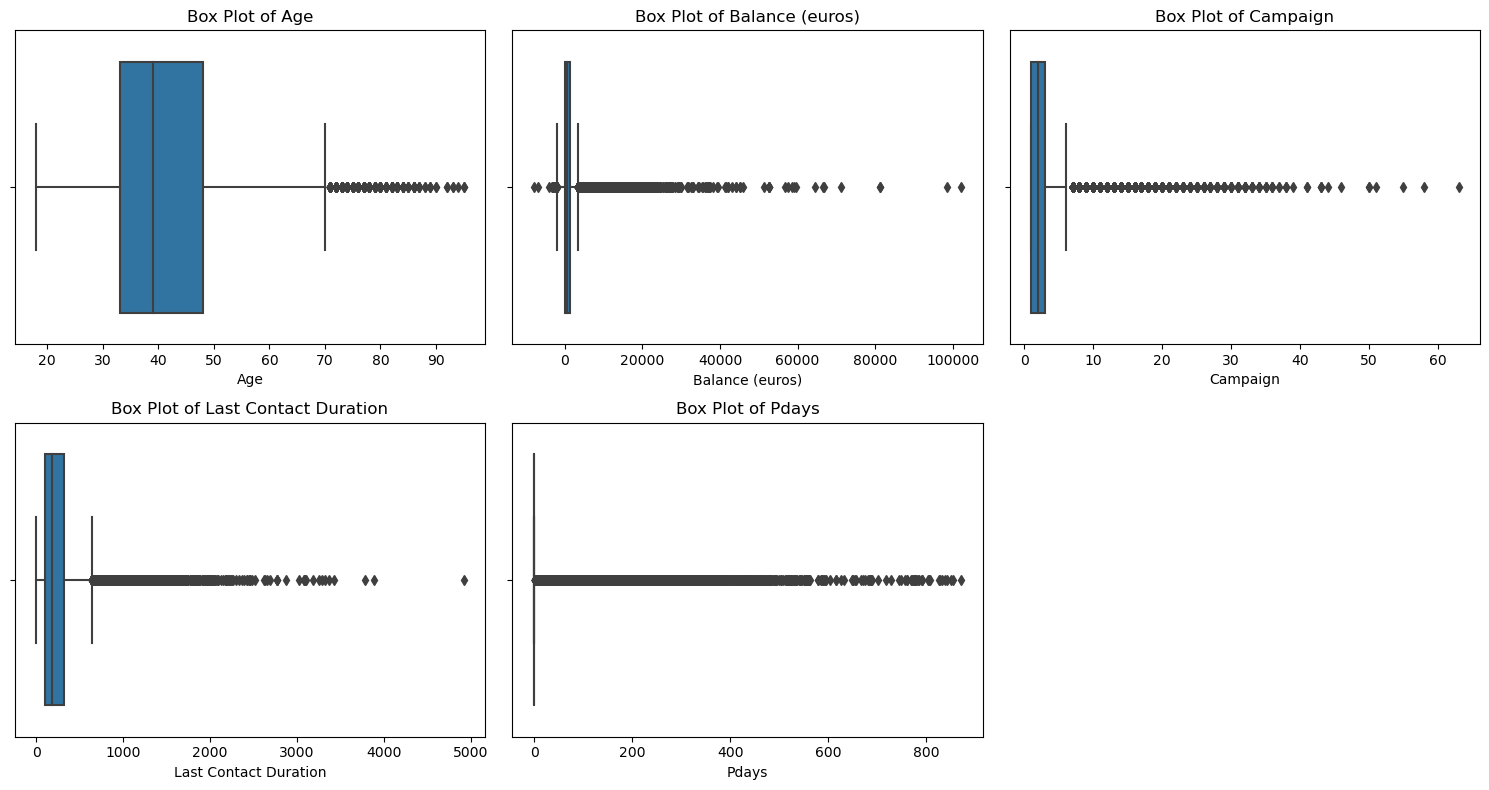

In [22]:
#A box plot shows the distribution of data based on quartiles and highlights values 
#that fall outside the typical range.
# List of numerical columns to visualize
numerical_columns = ['Age', 'Balance (euros)', 'Campaign', 'Last Contact Duration', 'Pdays']

# Plot box plots for each numerical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

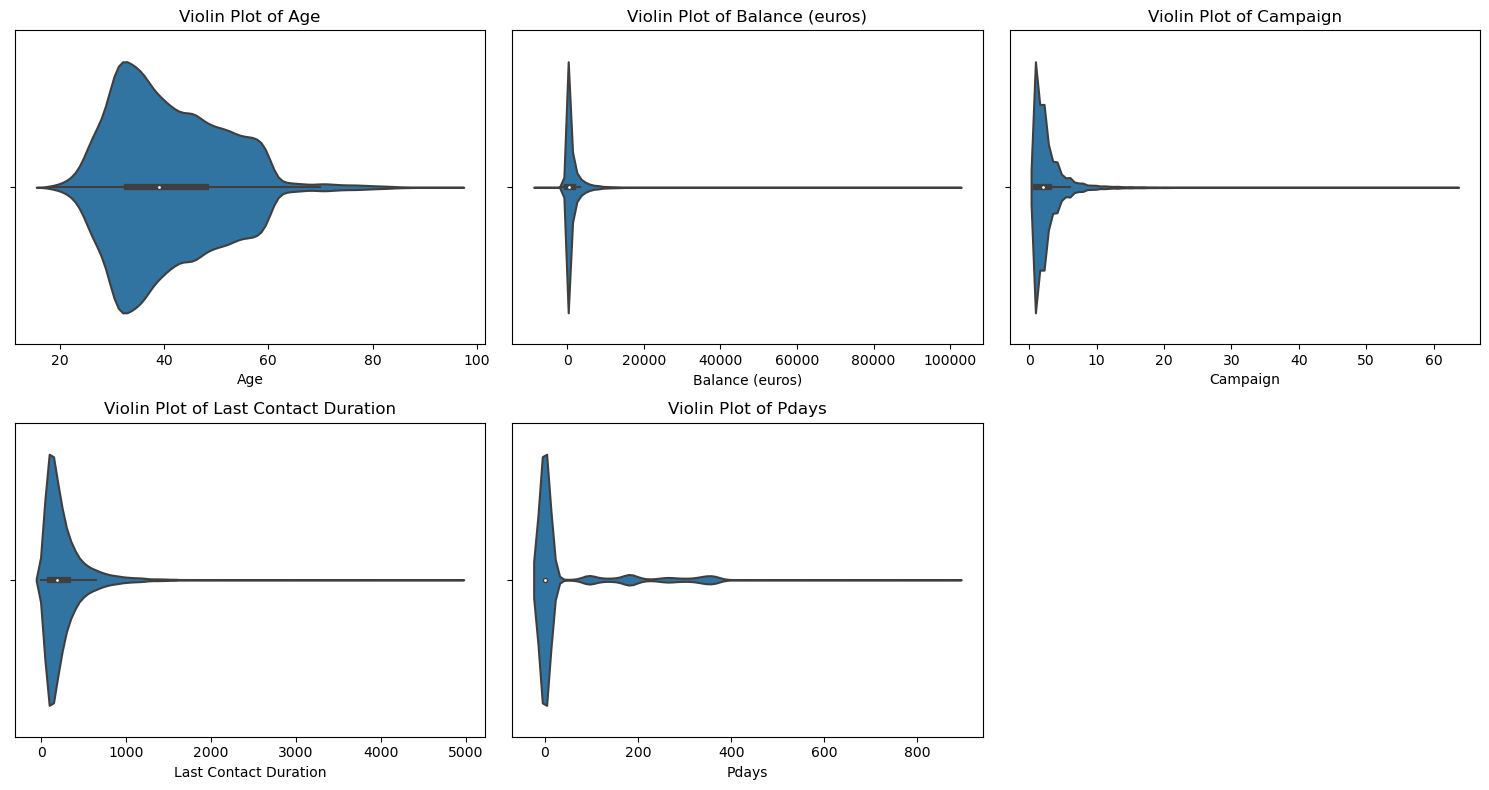

In [23]:
#2. Violin Plot
#Violin plots show the distribution of data across different levels of a variable and can reveal both the density and the outliers.
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

In [24]:
# Function to count outliers based on IQR method
def count_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
    
    return outlier_counts

# List of numerical columns to check for outliers
numerical_columns = ['Age', 'Balance (euros)', 'Campaign', 'Last Contact Duration', 'Pdays']

# Calculate outlier counts
outlier_counts = count_outliers(df, numerical_columns)
print("Outlier counts for each column:")
print(outlier_counts)


Outlier counts for each column:
{'Age': 487, 'Balance (euros)': 4729, 'Campaign': 3064, 'Last Contact Duration': 3235, 'Pdays': 8257}


In [25]:
# Function to detect and handle outliers using IQR
def handle_outliers_iqr(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        # Capping the outliers
        df[col]= np.where(df[col]<lower_bound, lower_bound, df[col])
        df[col]= np.where(df[col]>upper_bound, upper_bound, df[col])
    return df

#Apply to relevant columns

columns_with_outliers = ["Balance (euros)", "Campaign", "Pdays","Age","Last Contact Duration"]
df=handle_outliers_iqr(df, columns_with_outliers)
df
        

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,643.0,3.0,-1.0,0,unknown,2
45207,70.5,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2.0,-1.0,0,unknown,2
45208,70.5,retired,married,secondary,no,3462.0,no,no,cellular,17,nov,643.0,5.0,-1.0,3,success,2
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4.0,-1.0,0,unknown,1


In [26]:
# Feature Engineering (Encoding Categorical Variables)
# Encode categorical variables using get dummies

data_encoded = pd.get_dummies(df, columns=['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan',
    'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome'], drop_first=True).astype(int)

In [27]:
data_encoded

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription,Job_blue-collar,Job_entrepreneur,...,Last Contact Month_jul,Last Contact Month_jun,Last Contact Month_mar,Last Contact Month_may,Last Contact Month_nov,Last Contact Month_oct,Last Contact Month_sep,Poutcome_other,Poutcome_success,Poutcome_unknown
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,643,3,-1,0,2,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,70,1729,17,456,2,-1,0,2,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,70,3462,17,643,5,-1,3,2,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1


In [28]:
# Model Training and Evaluation
X=data_encoded.drop('Subscription', axis=1)
y=data_encoded['Subscription']

In [29]:
X

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Last Contact Month_jul,Last Contact Month_jun,Last Contact Month_mar,Last Contact Month_may,Last Contact Month_nov,Last Contact Month_oct,Last Contact Month_sep,Poutcome_other,Poutcome_success,Poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,643,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,70,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,70,3462,17,643,5,-1,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
y

0        1
1        1
2        1
3        1
4        1
        ..
45206    2
45207    2
45208    2
45209    1
45210    1
Name: Subscription, Length: 45211, dtype: int32

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [32]:
# Initialize models
log_reg=LogisticRegression(max_iter=1000, random_state=42)


In [33]:
# Train and Evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg= log_reg.predict(X_test)
f1_log_reg= f1_score(y_test, y_pred_log_reg)

C:\Users\AayushComp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(f'F1 Score for Logistic Regression: {f1_log_reg}')

F1 Score for Logistic Regression: 0.9432814021421616


In [35]:
# Initialize model with Decision Tree

decision_tree=DecisionTreeClassifier(random_state=42)


In [36]:
# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
decision_tree_pred=decision_tree.predict(X_test)
decision_tree_pred


array([1, 1, 1, ..., 1, 1, 2])

In [37]:
#Calculate the F1_Score
f1_decision_tree=f1_score(y_test, decision_tree_pred)


In [38]:
print(f'F1 Score for Decision Tree: {f1_decision_tree}')

F1 Score for Decision Tree: 0.9270611785312148


In [39]:
# Initialize model with Random Forest

random_forest=RandomForestClassifier(random_state=42)

In [40]:
# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_rand_forest=random_forest.predict(X_test)
f1_rand_forest=f1_score(y_test, y_pred_rand_forest)
print(f'F1 Score for Random Forest:{f1_rand_forest}')

F1 Score for Random Forest:0.9465090776166687


### HYPER-PARAMETER TUNING with the help of GRID_SEARCH CV

Hyperparameter tuning is the process of selecting the best set of hyperparameters for a machine learning model to optimize its performance. GridSearchCV is a powerful tool in scikit-learn that automates this process by exhaustively searching over a predefined hyperparameter grid.

In [41]:
# 1) Parameter Grid
# Set up the parameter grid for Random Forest
param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[None, 10,20,30],
    'min_samples_split':[2,5,10]
}

n_estimators: The number of trees in the Random Forest. More trees can improve performance but will increase computation time.
max_depth: The maximum depth of each tree. Setting it to None means the tree nodes will expand until all leaves are pure or contain fewer samples than min_samples_split.
min_samples_split: The minimum number of samples required to split an internal node. Higher values can prevent overfitting by making trees less complex.

In [42]:
# 2) GridSearchCV Initialization:
grid_search_rf= GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1',n_jobs=-1)

 estimator: The base model (RandomForestClassifier) to be tuned.
param_grid: The dictionary of hyperparameters to test.
cv=5: The number of cross-validation folds. This means the data will be split into 5 parts, with the model trained on 4 and tested on 1, rotating through all parts.
scoring='f1': The metric used to evaluate model performance. The F1 score is used here as it balances precision and recall.
n_jobs=-1: Uses all available processors to speed up the process.

In [43]:
grid_search_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [44]:
# 3) Fitting the Model
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

The best_estimator_ attribute gives you the model with the highest F1 score from the cross-validation.

In [45]:
#4) Extracting the Best Model
best_rf= grid_search_rf.best_estimator_

 predict(): Makes predictions on the test set using the tuned model.
f1_score(): Calculates the F1 score on the test set to evaluate the model's performance.

In [46]:
#Evaluating the Best Model
y_pred_best_rf = best_rf.predict(X_test)
f1_best_rf= f1_score(y_test, y_pred_best_rf)
print(f'Best F1 score after Hyperparameter Tuning for Random Forest:{f1_best_rf}')
print(f'Best Parameters: {grid_search_rf.best_params_}')

Best F1 score after Hyperparameter Tuning for Random Forest:0.9469331495520331
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}


### Another method Apply here Column_Transformer

In [47]:
pan=pd.read_csv('Bank Marketing.csv')

In [48]:
pan

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [49]:
pan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [50]:
# Function to detect and handle outliers using IQR
def handle_outliers_iqr(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        # Capping the outliers
        df[col]= np.where(df[col]<lower_bound, lower_bound, df[col])
        df[col]= np.where(df[col]>upper_bound, upper_bound, df[col])
    return df

#Apply to relevant columns

columns_with_outliers = ["Balance (euros)", "Campaign", "Pdays","Age","Last Contact Duration"]
pan=handle_outliers_iqr(pan, columns_with_outliers)
pan
        

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,643.0,3.0,-1.0,0,unknown,2
45207,70.5,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2.0,-1.0,0,unknown,2
45208,70.5,retired,married,secondary,no,3462.0,no,no,cellular,17,nov,643.0,5.0,-1.0,3,success,2
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4.0,-1.0,0,unknown,1


In [51]:
# Function to count outliers based on IQR method
def count_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
    
    return outlier_counts

# List of numerical columns to check for outliers
numerical_columns = ['Age', 'Balance (euros)', 'Campaign', 'Last Contact Duration', 'Pdays']

# Calculate outlier counts
outlier_counts = count_outliers(df, numerical_columns)
print("Outlier counts for each column:")
print(outlier_counts)


Outlier counts for each column:
{'Age': 0, 'Balance (euros)': 0, 'Campaign': 0, 'Last Contact Duration': 0, 'Pdays': 0}


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Explanation:
ColumnTransformer: This allows you to apply different preprocessing steps to different columns in the DataFrame.
transformers: A list of tuples specifying the name of the transformer, the transformer itself (OneHotEncoder), and the columns to which it should be applied.
drop='first': Drops the first category to avoid the dummy variable trap.
sparse=False: Ensures that the output is a dense array.
remainder='drop': Drops any columns not specified in categorical_columns. You can change this to 'passthrough' to keep non-transformed columns in the output if needed.
get_feature_names_out(): Retrieves the names of the one-hot encoded columns, which are used as column labels in the DataFrame.

In [53]:
## Initialize ColumnTransformer with OneHotEncoder
categorical_columns = [
    'Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan',
    'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome'
]

In [54]:
column_transformer = ColumnTransformer(
transformers=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False),categorical_columns)
], 
remainder='drop'
)

In [55]:
# # Fit and transform the categorical columns
encoded_array = column_transformer.fit_transform(pan)

In [56]:
encoded_array

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [57]:
## Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array,columns=column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_columns))


In [58]:
print(encoded_df)

       Job_blue-collar  Job_entrepreneur  Job_housemaid  Job_management  \
0                  0.0               0.0            0.0             1.0   
1                  0.0               0.0            0.0             0.0   
2                  0.0               1.0            0.0             0.0   
3                  1.0               0.0            0.0             0.0   
4                  0.0               0.0            0.0             0.0   
...                ...               ...            ...             ...   
45206              0.0               0.0            0.0             0.0   
45207              0.0               0.0            0.0             0.0   
45208              0.0               0.0            0.0             0.0   
45209              1.0               0.0            0.0             0.0   
45210              0.0               1.0            0.0             0.0   

       Job_retired  Job_self-employed  Job_services  Job_student  \
0              0.0             

In [59]:
data_not_categorical = pan.drop(categorical_columns, axis=1).reset_index(drop=True)

In [60]:
data_not_categorical

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
0,58.0,2143.0,5,261.0,1.0,-1.0,0,1
1,44.0,29.0,5,151.0,1.0,-1.0,0,1
2,33.0,2.0,5,76.0,1.0,-1.0,0,1
3,47.0,1506.0,5,92.0,1.0,-1.0,0,1
4,33.0,1.0,5,198.0,1.0,-1.0,0,1
...,...,...,...,...,...,...,...,...
45206,51.0,825.0,17,643.0,3.0,-1.0,0,2
45207,70.5,1729.0,17,456.0,2.0,-1.0,0,2
45208,70.5,3462.0,17,643.0,5.0,-1.0,3,2
45209,57.0,668.0,17,508.0,4.0,-1.0,0,1


In [61]:
final_data=pd.concat([data_not_categorical, encoded_df],axis=1)

In [62]:
final_data

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription,Job_blue-collar,Job_entrepreneur,...,Last Contact Month_jul,Last Contact Month_jun,Last Contact Month_mar,Last Contact Month_may,Last Contact Month_nov,Last Contact Month_oct,Last Contact Month_sep,Poutcome_other,Poutcome_success,Poutcome_unknown
0,58.0,2143.0,5,261.0,1.0,-1.0,0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44.0,29.0,5,151.0,1.0,-1.0,0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33.0,2.0,5,76.0,1.0,-1.0,0,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,1506.0,5,92.0,1.0,-1.0,0,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33.0,1.0,5,198.0,1.0,-1.0,0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825.0,17,643.0,3.0,-1.0,0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,70.5,1729.0,17,456.0,2.0,-1.0,0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45208,70.5,3462.0,17,643.0,5.0,-1.0,3,2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45209,57.0,668.0,17,508.0,4.0,-1.0,0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [63]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45211 non-null  float64
 1   Balance (euros)         45211 non-null  float64
 2   Last Contact Day        45211 non-null  int64  
 3   Last Contact Duration   45211 non-null  float64
 4   Campaign                45211 non-null  float64
 5   Pdays                   45211 non-null  float64
 6   Previous                45211 non-null  int64  
 7   Subscription            45211 non-null  int64  
 8   Job_blue-collar         45211 non-null  float64
 9   Job_entrepreneur        45211 non-null  float64
 10  Job_housemaid           45211 non-null  float64
 11  Job_management          45211 non-null  float64
 12  Job_retired             45211 non-null  float64
 13  Job_self-employed       45211 non-null  float64
 14  Job_services            45211 non-null

In [64]:
# Model Training and Evaluation
X1=final_data.drop('Subscription', axis=1)
y1=final_data['Subscription']



In [65]:
X1

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Last Contact Month_jul,Last Contact Month_jun,Last Contact Month_mar,Last Contact Month_may,Last Contact Month_nov,Last Contact Month_oct,Last Contact Month_sep,Poutcome_other,Poutcome_success,Poutcome_unknown
0,58.0,2143.0,5,261.0,1.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44.0,29.0,5,151.0,1.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33.0,2.0,5,76.0,1.0,-1.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,1506.0,5,92.0,1.0,-1.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33.0,1.0,5,198.0,1.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825.0,17,643.0,3.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,70.5,1729.0,17,456.0,2.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45208,70.5,3462.0,17,643.0,5.0,-1.0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45209,57.0,668.0,17,508.0,4.0,-1.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [66]:
y1

0        1
1        1
2        1
3        1
4        1
        ..
45206    2
45207    2
45208    2
45209    1
45210    1
Name: Subscription, Length: 45211, dtype: int64

In [67]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3, random_state=42)

In [68]:
# Initialize models
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000, random_state=42)


In [69]:
# Train and Evaluate Logistic Regression
from sklearn.metrics import f1_score
log_reg.fit(X_train, y_train)
y_pred_log_reg= log_reg.predict(X_test)
f1_log_reg= f1_score(y_test, y_pred_log_reg)

C:\Users\AayushComp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print(f'F1 Score for Logistic Regression: {f1_log_reg}')

F1 Score for Logistic Regression: 0.9430742350981268


In [71]:
# Initialize model with Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=42)

In [72]:
# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
decision_tree_pred=decision_tree.predict(X_test)
decision_tree_pred


array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [73]:
f1_decision_tree=f1_score(y_test, decision_tree_pred)

In [74]:
print(f'F1 Score for Decision Tree: {f1_decision_tree}')

F1 Score for Decision Tree: 0.92779632721202


In [75]:
# Initialize model with Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)

In [76]:
# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_rand_forest=random_forest.predict(X_test)
f1_rand_forest=f1_score(y_test, y_pred_rand_forest)
print(f'F1 Score for Random Forest:{f1_rand_forest}')

F1 Score for Random Forest:0.9464096934211597


### Hyper_Parameter

In [77]:
# 1) Parameter Grid
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[None, 10,20,30],
    'min_samples_split':[2,5,10]
}

In [78]:
# 2) GridSearchCV Initialization:
grid_search_rf1= GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1',n_jobs=-1)

In [79]:
grid_search_rf1

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [80]:
# 3) Fitting the Model
grid_search_rf1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [81]:
#4) Extracting the Best Model
best_rf1= grid_search_rf1.best_estimator_

In [82]:
# 5) Evaluating the Best Model
y_pred_best_rf = best_rf1.predict(X_test)
f1_best_rf= f1_score(y_test, y_pred_best_rf)
print(f'Best F1 score after Hyperparameter Tuning for Random Forest:{f1_best_rf}')
print(f'Best Parameters: {grid_search_rf1.best_params_}')

Best F1 score after Hyperparameter Tuning for Random Forest:0.9469970396204226
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
